# Домашняя работа 2

## Регрессия

С 1ого октября отменяется НДС на бриллианты, теперь они становятся новым инвестиционным инструментом. Давайте сделаем модель ценообразования для них.

Скачайте датасет diamonds.csv

В нем представлены характеристики бриллиантов и их цены с сайта jamesallen (B2C площадка) с 2022-07-01

**Описание полей**


* fluor - флуорисценуия (свойство камня светиться в лучах ультр)
* symmetry - показатель симметричности
* platform - название платформы, где был размещен камень
* quality_group - составной показатель из cut polish symmetry
* size_group - каратно весовая группа
* big_size_group - каратно-весовая группа
* shape - форма
* color - цвет
* clarity - чистота
* cut - качество огранки (может быть только у круглых камней)
* polish - полировка
* id - номер камня
* date - дата
* price - цена
* carat - кол-во карат
* tablepercent - размер площадки по отношению ширине
* price_per_carat - цена за карат
* z - длина (diameter)
* x - ширина
* depth_perc - отношение высоты к ширине
* y - высота



In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(path + '/diamonds.csv', index_col=0)

In [ ]:
df

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
135269,NONE,EX,jamesallen,PS,F,SI1,NaN,EX,13870838,202206,12850.0,1.55,8290.32,10.29,6.41,62.0,3.97420
48477,MED,EX,jamesallen,RD,H,VVS2,EX,EX,11725253,202207,7510.0,1.02,7362.75,6.41,6.45,62.5,4.03125
236786,NONE,EX,jamesallen,EM,H,IF,NaN,EX,14444347,202205,21220.0,2.01,10557.21,8.60,6.37,65.0,4.14050
235781,NONE,EX,jamesallen,RD,E,VS2,EX,EX,14438434,202207,8660.0,1.00,8660.00,6.39,6.44,61.4,3.95416
277744,NONE,VG,jamesallen,RD,F,VS1,VG,EX,14615276,202206,8480.0,1.00,8480.00,6.28,6.36,62.3,3.96228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,NONE,EX,jamesallen,RD,D,VS2,EX,EX,7535786,202207,8700.0,0.97,8969.07,6.36,6.32,62.2,3.93104
282754,NONE,EX,jamesallen,RD,D,VS2,EX,EX,14631732,202206,6650.0,0.90,7388.89,6.13,6.18,61.7,3.81306
141550,NONE,EX,jamesallen,RD,J,SI2,EX,EX,13932645,202205,11570.0,1.52,7611.84,7.36,7.39,61.0,4.50790
71237,STG,EX,jamesallen,RD,G,VS1,EX,EX,12699310,202207,8220.0,1.09,7541.28,6.55,6.60,62.0,4.09200


In [ ]:
df.describe()

,id,date,price,carat,price_per_carat,z,x,depth_perc,y
count,2.222220e+05,222222.000000,2.222220e+05,222222.000000,222222.000000,222222.000000,222222.000000,222222.000000,222222.000000
mean,1.358831e+07,202202.404627,1.171520e+04,1.342990,7034.908535,7.083479,6.423990,64.086827,4.097854
std,2.548511e+06,857.882625,2.540339e+04,0.724063,5216.446801,1.377311,1.046289,4.200656,0.599385
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.359865e+07,202205.000000,4.210000e+03,1.000000,4148.510000,6.260000,5.690000,61.800000,3.811500
50%,1.440046e+07,202206.000000,6.560000e+03,1.010000,5851.490000,6.530000,6.380000,63.000000,3.998400
75%,1.483763e+07,202207.000000,1.160000e+04,1.500000,8609.270000,7.660000,6.820000,66.000000,4.322500
max,1.541851e+07,202207.000000,2.380380e+06,21.170000,955000.000000,21.880000,18.050000,78.000000,10.739750


Необходимо предсказать `price_per_carat`

### Задание 1: Очистка

Не все камни успевают продаться за один месяц, поэтому в таблице есть повторы. Объедините данные по одному камню: подумайте, как лучше это сделать, какую цену брать.

**Попробуйте найти аномалии:** вдруг цена на некоторые камни сильно меняется (то есть продавец сам не знает, по какой цене их продавать). Также убедитесь, что остальные параметры камня не меняются.

In [ ]:
id_stat = df.groupby(by='id')['carat'].count().to_frame() #Посчитайте статистику по кол-ву камней
# разделите выборку на две части

ind_1 = id_stat[id_stat.carat == 1].index
ind_2_3 = id_stat[(id_stat.carat == 2) | (id_stat.carat == 3)].index

df_one = df.query('id in @ind_1')  # те камни, которые встречались один раз
df_three = df.query('id in @ind_2_3') # те камни, которые встречались 2 или 3 раза

stat = df_three.groupby('id')['price', 'carat', 'x', 'z', 'y', 'depth_perc'].agg(np.std) # Посчитайте стандартное отклонение по нескольким полям,
# подумайте где оно должно равняться 0, а где меняться в каких-то разумных пределах
# стандартное отклонение может меняться в разумных пределах только в цене камня, в других случаях камень не меняется с течением времени

# по описанию дата сета видно, что аномалии есть, удалим их, основываясь на интерквартильном размахе цены
iqr1 = df_three.describe()['price']['75%'] - df_three.describe()['price']['25%']
lim1 = df_three.describe()['price']['mean'] - 1.5 * iqr1
lim2 = df_three.describe()['price']['mean'] + 1.5 * iqr1
iqr2 = df_one.describe()['price']['75%'] - df_three.describe()['price']['25%']
lim3 = df_one.describe()['price']['mean'] - 1.5 * iqr2
lim4 = df_one.describe()['price']['mean'] + 1.5 * iqr2

# Удалим аномальные наблюдения
df_three = df_three.query('price > @lim1 and price < @lim2').sort_values(by=['id','date'])
df_one = df_one.query('price > @lim3 and price < @lim4').sort_values(by=['id','date'])

df_three = df_three.groupby('id').agg('last').reset_index() #тепреь в качестве цены возьмем последнее значение по времени
df = pd.concat([df_one, df_three]).reset_index(drop=True) # соединяем результаты

<ipython-input-57-cf368b5e3e69>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stat = df_three.groupby('id')['price', 'carat', 'x', 'z', 'y', 'depth_perc'].agg(np.std) # Посчитайте стандартное отклонение по нескольким полям,


In [ ]:
df

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
0,MED,EX,jamesallen,RD,D,VS2,EX,VG,19476,202207,19830.0,1.52,13046.05,7.35,7.32,62.0,4.53840
1,NONE,VG,jamesallen,RAD,E,VS1,NaN,VG,19613,202207,5820.0,1.01,5762.38,5.83,5.38,70.8,3.80904
2,MED,EX,jamesallen,RAD,D,SI1,NaN,EX,19715,202207,12160.0,1.55,7845.16,7.02,6.24,72.3,4.51152
3,NONE,G,jamesallen,EM,E,VS1,NaN,VG,19754,202206,22580.0,2.02,11178.22,8.21,6.63,61.2,4.05756
4,NONE,EX,jamesallen,EM,K,VVS2,NaN,VG,19792,202207,15430.0,2.52,6123.02,8.12,6.82,71.1,4.84902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147451,NONE,EX,jamesallen,RD,K,SI1,EX,EX,15409661,202207,4300.0,1.08,3981.48,6.55,6.56,62.1,4.07376
147452,NONE,EX,jamesallen,RD,I,SI1,EX,EX,15409696,202207,6040.0,1.01,5980.20,6.46,6.49,60.8,3.94592
147453,MED,EX,jamesallen,OV,H,VVS2,None,EX,15410303,202207,6620.0,1.01,6554.46,7.76,5.40,65.0,3.51000
147454,NONE,VG,jamesallen,EM,D,VS1,None,EX,15410668,202207,14750.0,1.50,9833.33,7.84,5.43,65.8,3.57294


Цены на бриллианты достаточно сильно меняются, попробуйте вычислить коэффициент инфляции и привести цены к последнему месяцу. Стоит учесть, что цены на все бриллианты не изменяются синхронно, то есть изменение в определенных группах может быть разным.

*Определите эти группы и рассчитайте коэффициенты инфляции для каждой из них. Подправьте цены на эти коэффициенты и создайте новую переменную.*

In [ ]:
categories = ['color', 'carat'] #определите по каким группам отпределять инфляцию (к примеру, можно добавить каратную группу и цвет)

df_index_color = df.groupby(['date'] + [categories[0]])[['price_per_carat']]\
             .max()\
             .reset_index().sort_values(by = 'date') # максимальное значение цены по группам цветов

df_index_carat = df.groupby(['date'] + [categories[1]])[['price_per_carat']]\
             .max()\
             .reset_index().sort_values(by = 'date') # максимальное значение цены по группам карат

date_max = df_index_color.date.max()

df_index_color = df_index_color.merge(df_index_color.query('date == @date_max')[[categories[0]] + ['price_per_carat']]\
                          .rename(columns={'price_per_carat': 'price_per_carat_max_color'}), 
                          on=categories[0], how='outer') # сопоставляем группы с максимальной датой

df_index_carat = df_index_carat.merge(df_index_carat.query('date == @date_max')[[categories[1]] + ['price_per_carat']]\
                          .rename(columns={'price_per_carat': 'price_per_carat_max_carat'}), 
                          on=categories[1], how='outer') # сопоставляем группы с максимальной датой


df_index_color['inflation_color'] = df_index_color['price_per_carat_max_color'] / df_index_color.price_per_carat # вычисляем коэффициент инфляции по группам цветов

df_index_carat['inflation_carat'] = df_index_carat['price_per_carat_max_carat'] / df_index_carat.price_per_carat # вычисляем коэффициент инфляции по группам карат


df_with_inf = df.merge(df_index_color[['date'] + [categories[0]] + ['inflation_color']], 
                        on=['date'] + [categories[0]], how='left') # соединяем все в одной таблице

df_with_inf = df_with_inf.merge(df_index_carat[['date'] + [categories[1]] + ['inflation_carat']], 
                        on=['date'] + [categories[1]], how='left') # соединяем все в одной таблице

df_with_inf['price_Carat'] = df_with_inf['price'] * df_with_inf['inflation_carat'] # индексированные цены по каратам

df_with_inf['price_Color'] = df_with_inf['price'] * df_with_inf['inflation_color'] # индексированные цены по цветам

df_with_inf = df_with_inf.round(decimals = 2)
df_with_inf

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,...,carat,price_per_carat,z,x,depth_perc,y,inflation_color,inflation_carat,price_Carat,price_Color
0,MED,EX,jamesallen,RD,D,VS2,EX,VG,19476,202207,...,1.52,13046.05,7.35,7.32,62.0,4.54,1.00,1.0,19830.0,19830.00
1,NONE,VG,jamesallen,RAD,E,VS1,NaN,VG,19613,202207,...,1.01,5762.38,5.83,5.38,70.8,3.81,1.00,1.0,5820.0,5820.00
2,MED,EX,jamesallen,RAD,D,SI1,NaN,EX,19715,202207,...,1.55,7845.16,7.02,6.24,72.3,4.51,1.00,1.0,12160.0,12160.00
3,NONE,G,jamesallen,EM,E,VS1,NaN,VG,19754,202206,...,2.02,11178.22,8.21,6.63,61.2,4.06,0.99,1.0,22580.0,22364.84
4,NONE,EX,jamesallen,EM,K,VVS2,NaN,VG,19792,202207,...,2.52,6123.02,8.12,6.82,71.1,4.85,1.00,1.0,15430.0,15430.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147451,NONE,EX,jamesallen,RD,K,SI1,EX,EX,15409661,202207,...,1.08,3981.48,6.55,6.56,62.1,4.07,1.00,1.0,4300.0,4300.00
147452,NONE,EX,jamesallen,RD,I,SI1,EX,EX,15409696,202207,...,1.01,5980.20,6.46,6.49,60.8,3.95,1.00,1.0,6040.0,6040.00
147453,MED,EX,jamesallen,OV,H,VVS2,None,EX,15410303,202207,...,1.01,6554.46,7.76,5.40,65.0,3.51,1.00,1.0,6620.0,6620.00
147454,NONE,VG,jamesallen,EM,D,VS1,None,EX,15410668,202207,...,1.50,9833.33,7.84,5.43,65.8,3.57,1.00,1.0,14750.0,14750.00


### Задание 2: Модель

Определите функцию потерь (MSE или MAE) и аргументируйте выбор.
Попробуйте сделать baseline.
Используйте LableEncoder для категориальных фичей и **постройте линейную модель**.

In [ ]:
# будем использовать функцию потерь MSE, так как постарались избавиться от выбросов и не будем демонстрировать результат работы алгоритма конечному пользователю
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# удалим из датасета колонки, корелиррующие с нашим таргетом, а также признаки id, date
# заменим все пропуски строковыми 0 для дальнейшей простоты обработки, удалять пропуски не будем, так как в случае fluor этих значений много, и это значит отсутствие свечения - None,  вместе с FNT, MED, STG
# и в случае cut этих значений много, и это значит что такого признака нет не для круглых форм, то есть можно поставить в качестве значения 0
df_with_inf_cut = df_with_inf.drop(columns = ['id', 'date', 'price', 'price_Carat', 'price_Color'])
dfLabInc = df_with_inf_cut.replace({None:'0', np.NaN:'0', 'NONE':'0', 'nan':'0', 'NaN':'0', 'No':'0'})

# кодируем категориальные признаки с помощью label encoder
LE = LabelEncoder()

LE.fit(dfLabInc.cut)
dfLabInc.cut = LE.transform(dfLabInc.cut)

LE.fit(dfLabInc.fluor)
dfLabInc.fluor = LE.transform(dfLabInc.fluor)

LE.fit(dfLabInc['shape'])
dfLabInc['shape'] = LE.transform(dfLabInc['shape'])

LE.fit(dfLabInc['symmetry'])
dfLabInc['symmetry'] = LE.transform(dfLabInc['symmetry'])

LE.fit(dfLabInc['platform'])
dfLabInc['platform'] = LE.transform(dfLabInc['platform'])

LE.fit(dfLabInc['color'])
dfLabInc['color'] = LE.transform(dfLabInc['color'])

LE.fit(dfLabInc['clarity'])
dfLabInc['clarity'] = LE.transform(dfLabInc['clarity'])

LE.fit(dfLabInc['polish'])
dfLabInc['polish'] = LE.transform(dfLabInc['polish'])

X = dfLabInc.drop(columns=["price_per_carat"])
y = dfLabInc["price_per_carat"]

# делим датасет на тренировочную и валидационную выборки, обучаем модель Lin Regr, делаем предсказание на валидационном сете
# получаем большую среднеквадратичную ошибку 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

model_lr_LabInc = LinearRegression().fit(X_train, y_train)

y_pred = model_lr_LabInc.predict(X_valid)

print("MSE: ", mean_squared_error(y_valid, y_pred))


MSE:  2325444.0860892166


In [ ]:
# смотрим круглые формы, в них нет 0 значений
df[df['shape']=='RD']['cut'].replace({None:'0', np.NaN:'0', 'NONE':'0', 'nan':'0', 'NaN':'0', 'No':'0'}).value_counts()

EX    58884
VG    18022
G      1355
Name: cut, dtype: int64

Теперь попробуйте OHE или TargetEncoder (сравните их).

Нормализуйте данные.

Поработайте с пропусками (обратите внимание на то, что у fluor возможен пропуск значения, а возможно отсутствие флуоресценции)

Покажите, насколько получилось улучшить результат.

In [ ]:
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# копируем датасет с закодированными признаками в пременную, так будет легче применять другие способы кодирования
# в cat сохраняем имена закодированных ранее признаков+
df_ohe = dfLabInc.copy()
cat = df_ohe.select_dtypes(int).columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from typing import Tuple, List

# применяем OHE к категориальным фичам
ohe = OneHotEncoder(drop = 'first')
ohe_data = pd.DataFrame(ohe.fit_transform(df_ohe[cat]).toarray())

# применяем нормализацию к оставшимся признакам, соединяем с закодированными столбцами 
df_ohe_cut= df_ohe.loc[:,~df_ohe.columns.isin(cat)]
col = df_ohe_cut.columns
scaler = StandardScaler() 
df_ohe_scaler = scaler.fit_transform(df_ohe_cut.to_numpy())
df_ohe_scaler = pd.DataFrame(df_ohe_scaler, columns = col)

df_ohe_cat = pd.concat([df_ohe_scaler, ohe_data], axis = 1)
df_ohe_cat

,carat,price_per_carat,z,x,depth_perc,y,inflation_color,inflation_carat,0,1,...,27,28,29,30,31,32,33,34,35,36
0,0.945088,2.651127,0.431342,1.350995,-0.518332,1.264840,-0.556043,-0.331691,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.524375,-0.115034,-0.944713,-1.075791,1.569057,-0.406624,-0.556043,-0.331691,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.031527,0.675956,0.132593,0.000001,1.924862,1.196150,-0.556043,-0.331691,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.385738,1.941771,1.209900,0.487860,-0.708094,0.165795,-0.898477,-0.331691,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.826389,0.021929,1.128423,0.725535,1.640218,1.974640,-0.556043,-0.331691,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147451,-0.322684,-0.791376,-0.292898,0.400296,-0.494611,0.188692,-0.556043,-0.331691,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
147452,-0.524375,-0.032311,-0.374375,0.312731,-0.802976,-0.086070,-0.556043,-0.331691,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
147453,-0.524375,0.185779,0.802515,-1.050772,0.193278,-1.093527,-0.556043,-0.331691,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
147454,0.887462,1.431014,0.874939,-1.013245,0.383041,-0.956147,-0.556043,-0.331691,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# разделяем таргет и признаки, делим на тренировочную и валидационную выборки, обучаем модель Lin Regr, делаем предсказание на валидационном сете
# видим, что ошибка существенно уменьшилась, делаем вывод о важности нормализации данных
X = df_ohe_cat.drop(columns=["price_per_carat"])
y = df_ohe_cat["price_per_carat"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

model_lr_ohe = LinearRegression()
model_lr_ohe.fit(X_train, y_train)
y_pred = model_lr_ohe.predict(X_valid)

print("MSE (LR): ", mean_squared_error(y_valid, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MSE (LR):  0.16046166568702044


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Сравните работу выбранной вами линейной модели с KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Обучаем модель KNN Regr с 3 соседями, делаем предсказание на валидационном сете
# видим, что по полученной среднеквадратичной ошибке алгоритм сработал немного лучше Lin Regr
model_knn = KNeighborsRegressor(n_neighbors = 3)
model_knn.fit(X_train, y_train)
y_pred_KNN = model_knn.predict(X_valid)

print("MSE (KNNR): ", mean_squared_error(y_valid, y_pred_KNN))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MSE (KNNR):  0.10787076508518312


## Классификация

Загрузите датасет bodyPerformance

Описание:

https://www.kaggle.com/datasets/kukuroo3/body-performance-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(path + '/bodyPerformance.csv', index_col=0) #укажите свой путь

In [ ]:
# сбрасываем неверный индекс age, смотрим описание датасета
df.reset_index(inplace=True)
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f4d2a20e850>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4d2a20ef10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4d2a20e4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4d2c698610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4d2c698910>],
 'means': []}

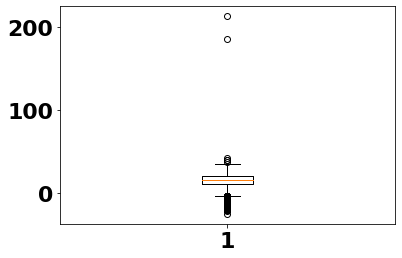

In [ ]:
# построим boxplot по признаку sit and bend forward_cm, увидим явные выбросы
plt.boxplot(df['sit and bend forward_cm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4d24467d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4d2441c280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4d244d48e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4d239502b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4d238e5a60>],
 'means': []}

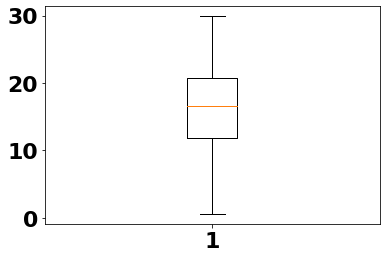

In [ ]:
# видим выбросы на признаке sit and bend forward_cm, удалим их с помощью интерквартильного размаха, построим boxplot теперь
iqr = df.describe()['sit and bend forward_cm']['75%'] - df.describe()['sit and bend forward_cm']['25%']
iqr
df1 = df[(df['sit and bend forward_cm']<(df.describe()['sit and bend forward_cm']['mean'] + 1.5*iqr)) & (df['sit and bend forward_cm']>(df.describe()['sit and bend forward_cm']['mean'] - 1.5*iqr))]
plt.boxplot(df1['sit and bend forward_cm'])

In [ ]:
# посмотрим , сколько категориальных признаков, и сколько в них уникальных значений, посмотрим количество пропусков, их нет
print(df.dtypes)
print(df.nunique())
df.isna().sum()

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object
age                          44
gender                        2
height_cm                   467
weight_kg                  1398
body fat_%                  527
diastolic                    89
systolic                    102
gripForce                   550
sit and bend forward_cm     528
sit-ups counts               81
broad jump_cm               245
class                         4
dtype: int64


age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

### Задание 1: Определение гендера

Постройте модель, которая будет определять гендер.

Для этого определите две метрики качества, на которые вы будете смотреть. Аргументируйте свой выбор.

После чего преобразуйте категориальные переменные и постройте модель бинарной классификации на основе линейного классификатора и сравните с KNN.

P.S.: не забудте про нормализацию.

In [ ]:
# возьмем метрики F1-score - среднее гармоническое точности и полноты, которое одинаково учитывает важность точности и полноты и потому показыает четкую картину работы алгоритма, устойчиво к несбалансированным данным
# confusion_matrix содержит число верно и неверно помеченных объектов двух классов, на ее основе строятся многие метрики 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns

# нормализуем наши признаки без категориальных, переменная col хранит их список
col = list(set(df.columns) - set(['gender','class']))
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df[col].to_numpy())
df_scaler = pd.DataFrame(df_scaler, columns = col)
df_scaler = pd.concat([df_scaler, df[['gender','class']]], axis = 1)

# закодируем таргет с помощью label encoder , а признак класса OHE
df_scaler = df_scaler.replace({'M':1, 'F':0})

df_scaler = pd.get_dummies(
    df_scaler,
    columns=df_scaler.select_dtypes(object).columns,
    #drop_first=True
)

# разделим датасет на таргет и все остальное, а также на тренировочную и валидационную выборки, посмотрим соотношение значений в таргете - датасет несбалансированный, поэтому делаем stratify
X = df_scaler.drop(columns=["gender"])
y = df_scaler["gender"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13, stratify = y)

print(f"Всего класса 0 в датастее: {(y == 0).sum()}, а класса 1: {(y == 1).sum()}")

Всего класса 0 в датастее: 4926, а класса 1: 8467


Valid LR:  F1 -- 0.990582695703355


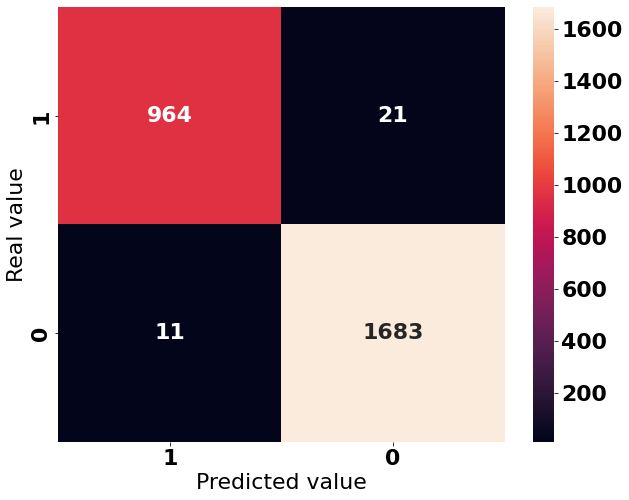

In [ ]:
# обучим модель Log Regr, предскажем таргет по валидационной выборке, смотрим метрики
model_LR = LogisticRegression()

model_LR.fit(X_train, y_train)

y_pred_LR = model_LR.predict(X_valid)

mp_mtx_LR = confusion_matrix(y_valid, y_pred_LR)
font = {'family' : 'Calibri', 'weight' : 'bold', 'size'   :22}
plt.rc('font', **font)
fig = plt.figure(figsize=(10,8))
sns.heatmap(mp_mtx_LR, annot=True, fmt="d", 
            xticklabels=df_scaler['gender'].unique(), 
            yticklabels=df_scaler["gender"].unique())
plt.ylabel("Real value")
plt.xlabel("Predicted value")

print(f"Valid LR:  F1 -- {f1_score(y_valid, y_pred_LR)}")
#print((y_pred_LR == y_valid).sum()/len(y_pred_LR))

Valid KNN:  F1 -- 0.9887905604719763


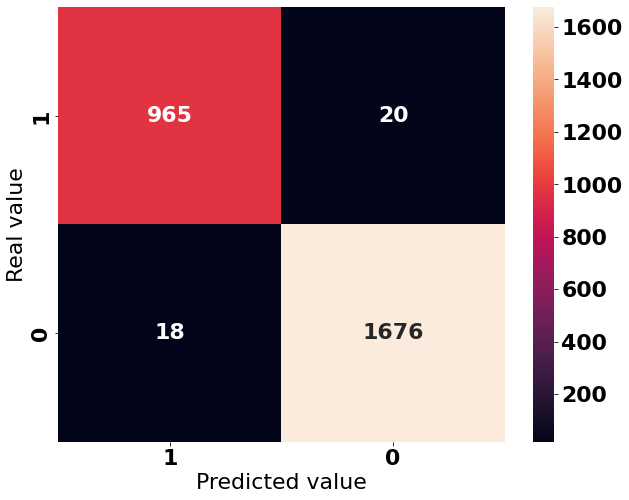

In [ ]:
# обучим модель KNN Class, предскажем таргет по валидационной выборке, смотрим метрики, видим, что метрики хорошие, и они чуть лучше у Logistic Regression
model_knn = KNeighborsClassifier(n_neighbors = 3)

model_knn.fit(X_train, y_train)

y_pred_KNN = model_knn.predict(X_valid)

mp_mtx_KNN = confusion_matrix(y_valid, y_pred_KNN)
font = {'family' : 'Calibri', 'weight' : 'bold', 'size'   :22}
plt.rc('font', **font)
fig = plt.figure(figsize=(10,8))
sns.heatmap(mp_mtx_KNN, annot=True, fmt="d", 
            xticklabels=df_scaler['gender'].unique(), 
            yticklabels=df_scaler["gender"].unique())
plt.ylabel("Real value")
plt.xlabel("Predicted value")

print(f"Valid KNN:  F1 -- {f1_score(y_valid, y_pred_KNN)}")

### Задание 2: Определение класса

Теперь опробуем построить модель, которая будет предсказывать class физической формы.

Для этого определите метрики качества для задачи мультиклассификации (аргументируйте выбор).

Постройте модель мультиклассовой классификации на основе линейного классификатора и сравните с KNN.

In [ ]:
# так как у нас не бинарная классификация, а выборка сбалансированная, можем взять precision score, будем его усреднять, используя подход подсчета macro, а также confusion matrix 
# качество модели показывает roc auc, посмотрим ее, используя комбинаци: один к остальным, один к одному из остальных
from sklearn.metrics import roc_auc_score, precision_score

enc = LabelEncoder()
enc.fit(df['class'])
df['class'] = enc.transform(df['class'])

enc.fit(df['gender'])
df['gender'] = enc.transform(df['gender'])

X = df.drop(columns=["class"])
y = df["class"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13, stratify = y)

print((y==0).sum(), (y==1).sum(), (y==2).sum(), (y==3).sum())

3348 3347 3349 3349


In [ ]:
# обучаем модель Log Regr, делаем предсказание на валидационном сете, делаем предсказание вероятности принадлежности к классам для roc auc
model_LR = LogisticRegression().fit(X_train, y_train)

y_pred_LR = model_LR.predict(X_valid)

y_pred_LR_proba = model_LR.predict_proba(X_valid)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MACRO precision score LR: 0.5976844522908052


Text(0.5, 41.0, 'Predicted value')

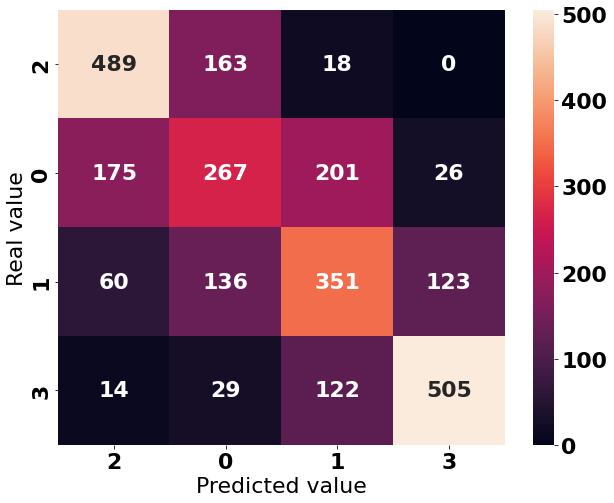

In [ ]:
# смотрим метрики, получается не очень, на confusion matrix видим подтверждение
print(f"MACRO precision score LR: {precision_score(y_valid, y_pred_LR, average='macro')}")

mp_mtx_LR = confusion_matrix(y_valid, y_pred_LR)
font = {'family' : 'Calibri', 'weight' : 'bold', 'size'   :22}
plt.rc('font', **font)
fig = plt.figure(figsize=(10,8))
sns.heatmap(mp_mtx_LR, annot=True, fmt="d", 
            xticklabels=df['class'].unique(), 
            yticklabels=df["class"].unique())
plt.ylabel("Real value")
plt.xlabel("Predicted value")

In [ ]:
# Рассчитаем ROC-AUC разными стратегиями, видим, что показания не очень хорошие

print(f"OvO LR: {roc_auc_score(y_valid, y_pred_LR_proba, multi_class='ovo')}")
print(f"OvR LR: {roc_auc_score(y_valid, y_pred_LR_proba, multi_class='ovr')}")

OvO LR: 0.8450445206091445
OvR LR: 0.8450679268030419


In [ ]:
# обучим модель KNN Class с 11 соседями, предскажем таргет по валидационной выборке, делаем предсказание вероятности принадлежности к классам для roc auc
model_knn = KNeighborsClassifier(n_neighbors = 11)

model_knn.fit(X_train, y_train)

y_pred_KNN = model_knn.predict(X_valid)

y_pred_KNN_proba = model_knn.predict_proba(X_valid)

MACRO precision score KNN: 0.6082056571187877


Text(0.5, 41.0, 'Predicted value')

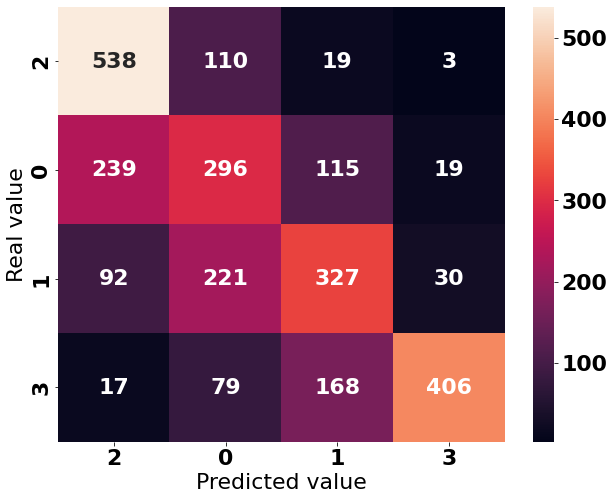

In [ ]:
# смотрим метрики, получается не очень, на confusion matrix видим подтверждение
print(f"MACRO precision score KNN: {precision_score(y_valid, y_pred_KNN, average='macro')}")

mp_mtx_KNN = confusion_matrix(y_valid, y_pred_KNN)
font = {'family' : 'Calibri', 'weight' : 'bold', 'size'   :22}
plt.rc('font', **font)
fig = plt.figure(figsize=(10,8))
sns.heatmap(mp_mtx_KNN, annot=True, fmt="d", 
            xticklabels=df['class'].unique(), 
            yticklabels=df["class"].unique())
plt.ylabel("Real value")
plt.xlabel("Predicted value")

In [ ]:
# Рассчитаем ROC-AUC разными стратегиями, видим, что показания не очень хорошие, сказать однозначно,какая из моделей сработала лучше, сложно

print(f"OvO KNN: {roc_auc_score(y_valid, y_pred_KNN_proba, multi_class='ovo')}")
print(f"OvR KNN: {roc_auc_score(y_valid, y_pred_KNN_proba, multi_class='ovr')}")

OvO KNN: 0.8204850453519609
OvR KNN: 0.8205006039999057


In [ ]:
# попробуем обучить модели нормированными данными, посмотрим метрики
# видим,что нормализация немного улучшила качество алгоритмов, и того и другого
scaler = StandardScaler()

scaler.fit(X_train, y_train) 

X_train_norm = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)

X_valid_norm = pd.DataFrame(scaler.transform(X_valid), index=X_valid.index, columns=X_valid.columns)

In [ ]:
# обучение Log Regr
model_LR_norm = LogisticRegression().fit(X_train_norm, y_train)

y_pred_LR_norm = model_LR_norm.predict(X_valid_norm)

y_pred_LR_proba_norm = model_LR_norm.predict_proba(X_valid_norm)

MACRO precision score LR normed: 0.6174234007521424


Text(0.5, 41.0, 'Predicted value')

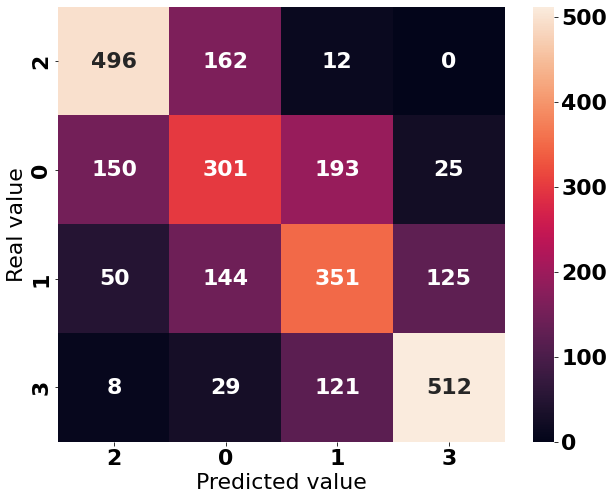

In [ ]:
# смотрим метрики
print(f"MACRO precision score LR normed: {precision_score(y_valid, y_pred_LR_norm, average='macro')}")

mp_mtx_LR_norm = confusion_matrix(y_valid, y_pred_LR_norm)
font = {'family' : 'Calibri', 'weight' : 'bold', 'size'   :22}
plt.rc('font', **font)
fig = plt.figure(figsize=(10,8))
sns.heatmap(mp_mtx_LR_norm, annot=True, fmt="d", 
            xticklabels=df['class'].unique(), 
            yticklabels=df["class"].unique())
plt.ylabel("Real value")
plt.xlabel("Predicted value")

In [ ]:
# Рассчитаем ROC-AUC 

print(f"OvO LR normed: {roc_auc_score(y_valid, y_pred_LR_proba_norm, multi_class='ovo')}")
print(f"OvR LR normed: {roc_auc_score(y_valid, y_pred_LR_proba_norm, multi_class='ovr')}")

OvO LR normed: 0.8567915553526569
OvR LR normed: 0.8568134899914814


In [ ]:
# обучаем KNN Classifier
model_knn_norm = KNeighborsClassifier(n_neighbors = 11)

model_knn_norm.fit(X_train_norm, y_train)

y_pred_KNN_norm = model_knn_norm.predict(X_valid_norm)

y_pred_KNN_proba_norm = model_knn_norm.predict_proba(X_valid_norm)

MACRO precision score KNN normed: 0.6400520045948664


Text(0.5, 41.0, 'Predicted value')

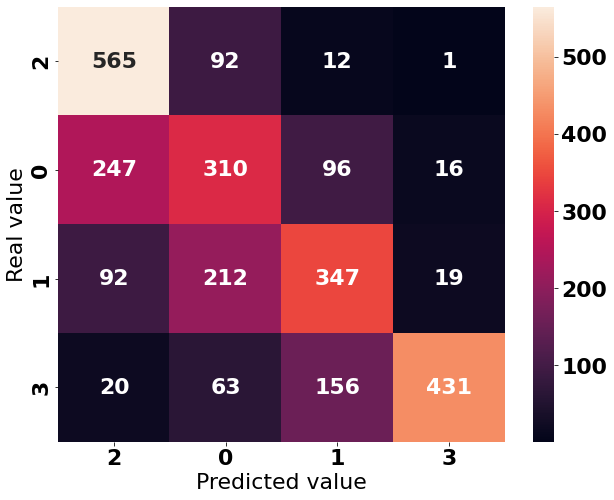

In [ ]:
# смотрим метрики
print(f"MACRO precision score KNN normed: {precision_score(y_valid, y_pred_KNN_norm, average='macro')}")

mp_mtx_KNN_norm = confusion_matrix(y_valid, y_pred_KNN_norm)
font = {'family' : 'Calibri', 'weight' : 'bold', 'size'   :22}
plt.rc('font', **font)
fig = plt.figure(figsize=(10,8))
sns.heatmap(mp_mtx_KNN_norm, annot=True, fmt="d", 
            xticklabels=df['class'].unique(), 
            yticklabels=df["class"].unique())
plt.ylabel("Real value")
plt.xlabel("Predicted value")

In [ ]:
# Рассчитаем ROC-AUC

print(f"OvO KNN normed: {roc_auc_score(y_valid, y_pred_KNN_proba_norm, multi_class='ovo')}")
print(f"OvR KNN normed: {roc_auc_score(y_valid, y_pred_KNN_proba_norm, multi_class='ovr')}")

OvO KNN normed: 0.846209369207107
OvR KNN normed: 0.8462243206850508
